# Kernel Methods

## Idea

The idea of kernel method is to define a comparison function from some set $\mathcal X \times\mathcal X \to \mathbf R$ and represent a set of data points by the $n \times n$ matrix

$$
[\mathbf K]_{ij} = K(\mathbf x_i, \mathbf x_j)
$$

then by using $K$, we don't need $\mathcal X$ to be a set of vectors, it can be string, images, etc

# 1. Kernels and RKHS
## 1.1 Positive Definite Kernels

**Definition 1.1 - Positive Definite Kernels**

*A **positive definite (p.d.) kernel** on a set $\mathcal X$ is a function $K: \mathcal X \times\mathcal X \to \mathbf R$ that is symmetric and satisfying *

$$\forall N \in \mathbf N, \forall (\mathbf x_1, \ldots, \mathbf x_N) \in \mathcal X^N, \forall (a_1, \ldots, a_N) \in \mathbf R^N:\\ \sum_{i=1}^N\sum_{j=1}^N a_i a_j K(\mathbf x_i, \mathbf x_j)\geq 0$$

*Equivalently, a p.d kernel is a function $K$ such that for any $N \in \mathbf N$, $(\mathbf x_1, \ldots, \mathbf x_N)\in \mathcal X^N$, the **similarity matrix** (or **Gram matrix**)*
$$
[\mathbf K]_{ij} = K(\mathbf x_i, \mathbf x_j)
$$
*is positive semidefinite*.

**Convention**

***Kernel methods** are algorithms taking such matrices as input.*

## 1.2 Simplest Kernels

**Lemma 1.2 - Dot-product kernels**

*Let $\mathcal X = \mathbf R^d$. The function $K: \mathcal X \times \mathcal X\to \mathbf R$ defined by *
$$
K(\mathbf x, \mathbf x') = \mathbf x \cdot \mathbf x'
$$
*is p.d.*

**Proof** (Linear Algebra)

**Lemma 1.3 - Dot-product preceded by a mapping**

*Let $\mathcal X$ be any set, $\Phi: \mathcal X \to \mathbf R^d$, then the function $K: \mathcal X\times \mathcal X \to \mathbf R$ defined by*
$$
K(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathbf R^d}
$$
*is a p.d kernel.*

**Proof**

Symmetry is obvious. 
$$\sum_{i=1}^N \sum_{j=1}^N a_i a_j \langle \Phi(\mathbf x_i), \Phi(\mathbf x_j) \rangle_{\mathbf R^d} = \Vert \sum_{i=1}^N a_i \Phi(x_i)\Vert^2_{\mathbf R^d} \geq 0$$

**Example - Polynomial kernels**

We know that $K(\mathbf x, \mathbf x') = \mathbf x\cdot \mathbf x'$ ($\mathbf R^2 \times \mathbf R^2 \to \mathbf R$) is a kernel. Is $L = K^2$ a kernel? Suppose $\mathbf x = (x_1, x_2)$, $\mathbf x' = (x'_1, x'_2)$, we have
$$
L(\mathbf x, \mathbf x') = (x_1 x'_1 + x_2 x'_2)^2 = (x_1)^2 (x'_1)^2 + (x_2)^2 (x'_2)^2 + 2 x_1 x_2 x'_1 x'_2
$$
Choose $\Phi(\mathbf x) = (x_1^2, x_2^2, \sqrt2 x_1 x_2)$ ($\mathbf R^2 \to \mathbf R^3$), we have $L(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathbf R^3} $. By lemma 1.3, $L$ is a kernel.

<img src="Kernel1.png" width=400></img>

## 1.3 Kernels are Inner Products

**Theorem 1.4 (Aronszajn, 1950) - Kernels are Inner Products**

*Let $X$ be any set. $K: \mathcal X \times \mathcal X \to \mathbf R$ is a p.d kernel on $\mathcal X$ iff there exists a Hilbert space $\mathcal H$ and a mapping $\Phi: \mathcal X \to \mathcal H$ s.t. for any $\mathbf x, \mathbf x' \in \mathcal X$*

$$
K(\mathbf x, \mathbf x') = \langle \Phi(\mathbf x), \Phi(\mathbf x')\rangle_{\mathcal H}
$$

**Proof** (Aronszajn (1944, 1950)

## 1.4 Reproducting Kernel Hilbert Space (RKHS)

**Definition 1.5 - RKHS**

*Let $\mathcal X$ be a set and $\mathcal H \subset \mathbf R^\mathcal X$ be a class of functions forming a (real) Hilbert space with inner product $\langle \cdot, \cdot\rangle_\mathcal H$. The function $K: \mathcal X^2 \to \mathbf R$ is called a reproducing kernel of $H$ if*

- *$\mathcal H$ contains all functions of the form $K_x = K(x, \cdot)$.*
- *For every $\mathbf x \in \mathcal X$ and $f \in \mathcal H$, the **reproducing property** holds:*
$$
f(\mathbf x) = \langle f, K_x\rangle_{\mathbf H}
$$

*If a r.k. $K$ exists then $\mathcal H$ is called the **reproducing kernel Hilbert space** (RKHS) of $K$.*

**Theorem 1.6 - An equivalent definition of RKHS**

*The Hilbert space $\mathcal H \subset \mathbf R^\mathcal X$ is a RKHS iff for any $\mathbf x \in \mathcal X$, the mapping*
$$
\mathbf F: \mathcal H \to \mathbf R\\
f \mapsto f(\mathbf x)
$$

*is continuous.*

**Proof** (TODO)

**Corollary 1.7 - Convergence in RKHS implies pointwise convergence**

*Let $(f_n)_{n \in \mathbf N}$ be a sequence of elements of $\mathcal H$ that converges to $f\in \mathcal H$, then $(f_n(\mathbf x))_{n \in \mathbf N}$ converges to $(f(\mathbf x))$ in $\mathbf R$ for any $\mathbf x \in \mathcal X$.*

**Theorem 1.8 - Uniqueness of RKHS and r.k.**

- *If $\mathcal H$ is a RKHS, then it has a unique r.k.*
- *A function $K$ in $\mathcal H$ can be the r.k. of at most one RKHS.*

(So we can talk about the kernel of a RKHS, or the RKHS of a kernel)

** Proof (TODO)**


**Theorem 1.9**

*A function $K: \mathcal X \times \mathcal X \to \mathbf R$ is positive definite iff it is a r.k. of some RKHS $\mathcal H \subset \mathbf R^\mathcal X$.*

## 1.5 Proof of Aronzsajn's Theorem

**Proof**

## 1.6 RKHS of Some Kernels

**Theorem 1.10 - RKHS of Linear Kernel**

*Let $\mathcal X = \mathbf R^d$ and the linear kernel $K(\mathbf x, \mathbf y) = \langle \mathbf x, \mathbf y \rangle_{\mathbf R^d}$. The RKHS of the linear kernel is the set of linear functions of the form:*

$$
f_{\mathbf w}(\mathbf x) = \langle \mathbf w, \mathbf x \rangle : \mathbf w \in \mathbf R^d
$$

*endowed with the inner product*

$$
\langle \mathbf w, \mathbf v \rangle_{\mathcal H} = \langle \mathbf w, \mathbf v \rangle_{\mathbf R^d}
$$

*so that the corresponding norm is*
$$
\Vert f_\mathbf w\Vert_{\mathcal H} = \Vert \mathbf w \Vert_{\mathbf R^d}
$$

**Example 1.11 - RKHS of Polynomial Kernel**

*Let $\mathcal X = \mathbf R^d$ and the quadratic polynomial kernel $K(\mathbf x, \mathbf y)=\langle x, y\rangle_{\mathbf R^d}^2$. The RKHS of $K$ is the set of quadratic functions*

$$
f_{\mathbf S}(\mathbf x) = \langle \mathbf S, \mathbf x\mathbf x^T \rangle_{F} = \mathbf x^T \mathbf S \mathbf x: \mathbf S \in \mathcal S^{d\times d} 
$$

*where $\mathcal S$ is the set of symmetric matrices in $\mathbf R^{d\times d}$, endowed with the inner-product $\langle f_{\mathbf S_1}, f_{\mathbf S_2}\rangle_{\mathcal H} = \langle\mathbf S_1, \mathbf S_2\rangle_F.$ and $\Vert \cdot \Vert_F$ is the Frobenius norm of matrices in $\mathbf R^{d\times d}$*

$$
\Vert [M]_{ij} \Vert_F^2 = \sum_{i=1}^d\sum_{j=1}^d |M_{ij}|^2
$$

**Theorem 1.12 - Operations on Kernels**

1. *If $K_1, K_2$ are p.d. kernels, then*
$$
K_1 + K_2, \\
K_1K_2, \\
cK_1 (c \geq 0)
$$

 *are also p.d. kernels.*
 
2. *If $(K_i)_{i \geq 1}$ is a sequence of p.d. kernels that converges pointwisely to a function $K$, i.e.*
$$
\forall (\mathbf x, \mathbf y) \in \mathcal X^2, K(\mathbf x, x') = \lim_{n \to +\infty} K_i(\mathbf x, \mathbf x')
$$
 *then K is also a p.d. kernel.*
 
3. *If $K$ is a p.d. kernel, then $\exp(K)$ is also a p.d. kernel.*

## 1.7 Remarks about Smoothness

By B.C.S, we have
$$
\forall f \in \mathcal H, \forall \mathbf x, \mathbf x' \in \mathcal X: 
$$
$$
|f(x) - f'(x)| = |\langle f, K_{\mathbf x} - K_{\mathbf x'}\rangle_{\mathcal H}| \leq \Vert f \Vert_{\mathcal H} \Vert K_{\mathbf x} - K_{\mathbf x'}\Vert_{\mathcal H} =: \Vert f \Vert_{\mathcal H} d_K(\mathbf x, \mathbf x')
$$

So the norm of a function in the RKHS controls the variation over $\mathcal X$ of $f$ w.r.t the geometry defined by the kernel.
A small norm gives a slow variation.

# 2. The Kernel Trick

## 2.1 Idea

*Any algorithm to process finite-dimensional vectors that can be expressed only in term of pairwise inner products can be applied to potentially infinite-dimensional vectors in the feature space of a p.d. kernel by rplacing each inner product evaluation by a kernel evaluation.*

## 2.2 Applications

**Example 2.1 - Compute Distances in the Feature Space**

We can define:
$$
d_K(\mathbf x_1, \mathbf x_2) = \Vert \Phi(\mathbf x_1) - \Phi(\mathbf x_2) \Vert_{\mathcal H}^2
$$

donc:
$$
d_K(\mathbf x_1, \mathbf x_2)^2 = K(\mathbf x_1, \mathbf x_1) + K(\mathbf x_2, \mathbf x_2) - 2K(\mathbf x_1, \mathbf x_2)
$$

$d_K(\mathbf x_1, \mathbf x_2)$ can be seen of the distance between $\mathbf x_1, \mathbf x_2$.

Illustration for distance in feature space with Gaussian Kernel between image of $z$ and $0$.

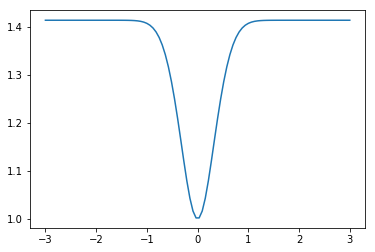

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sigma = 0.5

def gaussian_kernel(x, y):
    return np.exp(-(x-y)**2/sigma**2)

def gaussian_distance(z):
    return np.sqrt(gaussian_kernel(0, 0) + gaussian_kernel(z, z) - gaussian_kernel(z, 0))

interval = np.linspace(-3, 3, 100)
plt.plot(interval, gaussian_distance(interval))